# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [50]:
df = pd.read_csv(r"C:\Users\vagne\Downloads\Storytelling\MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv")

df.head(5)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [55]:
#média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [54]:
#mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


categorias: comidas-preparadas, belleza-y-cuidado-personal, congelados, frutas, verduras, lacteos, instataneos-y-sopas. 	 

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [44]:
#Seu código aqui
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
desvio_padrao_por_categoria

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,2210.041719
1,comidas-preparadas,2019.911428
2,congelados,2111.539896
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
5,lacteos,3925.816164
6,verduras,1012.699625


Os campos com maior desvio são os campos que apresentam maior divergencia entre média e mediana

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

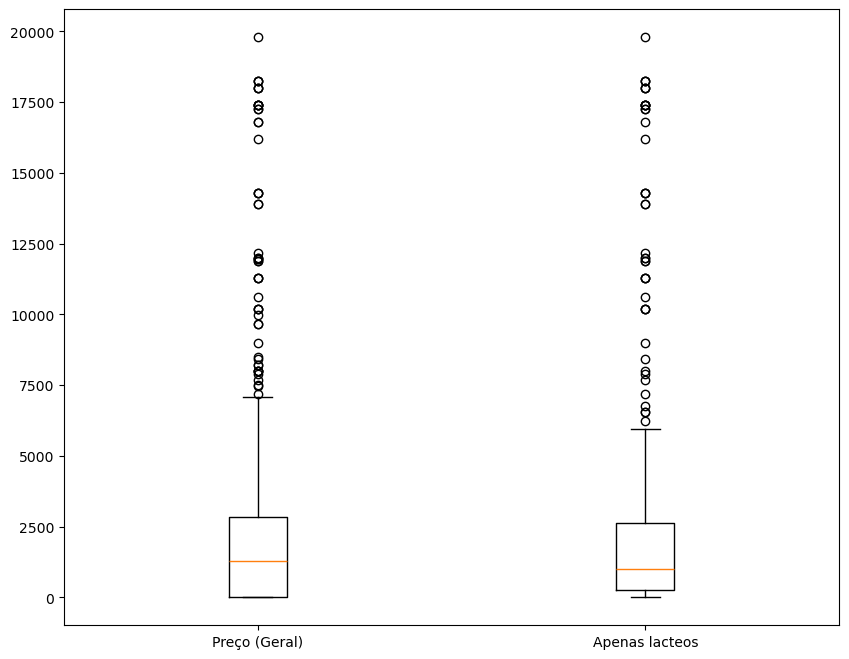

In [53]:
#Criando categoria para uso no boxplot
df_lacteos = df[df['Categoria'] == 'lacteos']

#Boxplot
plt.figure(figsize=(10,8))
plt.boxplot([df['Preco_Normal'], df_lacteos['Preco_Normal']], tick_labels=['Preço (Geral)', 'Apenas lacteos']);
plt.show()

In [ ]:
Há uma quantidade enorme de outliers, grande parte deles na categoria lacteos, o que distorce a leitura dos dados.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

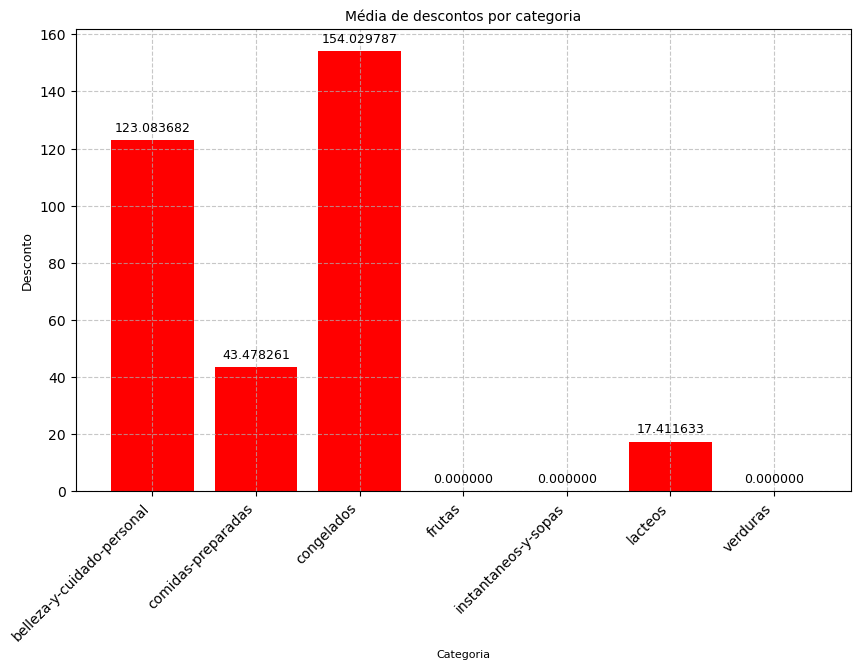

In [89]:
# Gráfico de media de descontos
plt.figure(figsize=(10, 6))
descontos_por_categoria = df.groupby('Categoria')['Desconto'].mean()
plt.bar(range(len(descontos_por_categoria)), descontos_por_categoria, color='Red')

#Rótulos
for i, valor in enumerate(descontos_por_categoria):
    plt.text(i, valor + 2, f'{valor:1f}', ha='center', va='bottom', fontsize=9)

#Centralização das categorias
plt.xticks(
    range(len(descontos_por_categoria)),
    descontos_por_categoria.index,
    rotation=45,
    ha='right'
)

#Personalização
plt.title('Média de descontos por categoria', fontsize=10)
plt.xlabel('Categoria', fontsize=8)
plt.ylabel('Desconto', fontsize=9)
plt.xticks(range(len(descontos_por_categoria)), descontos_por_categoria.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

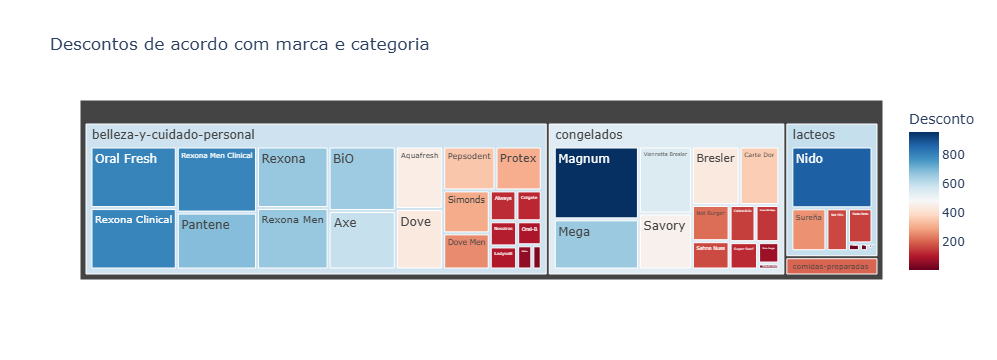

Categoria
belleza-y-cuidado-personal    123.083682
comidas-preparadas             43.478261
congelados                    154.029787
frutas                          0.000000
instantaneos-y-sopas            0.000000
lacteos                        17.411633
verduras                        0.000000
Name: Desconto, dtype: float64


In [94]:
#Treemap
desconto_por_categoria_e_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

fig = px.treemap(desconto_por_categoria_e_marca,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Descontos de acordo com marca e categoria',
                 color='Desconto',
                 color_continuous_scale='RdBu')
fig.show()

# Media de descontos
media_por_categoria = df.groupby('Categoria')['Desconto'].mean()

print(media_por_categoria)